In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100900split/1539034080_1539034320.csv
/kaggle/input/100900split/1539057480_1539057720.csv
/kaggle/input/100900split/1539022680_1539022920.csv
/kaggle/input/100900split/1539041280_1539041520.csv
/kaggle/input/100900split/1539045480_1539045720.csv
/kaggle/input/100900split/1539025680_1539025920.csv
/kaggle/input/100900split/1539043680_1539043920.csv
/kaggle/input/100900split/1539047880_1539048120.csv
/kaggle/input/100900split/1539029280_1539029520.csv
/kaggle/input/100900split/1539054480_1539054720.csv
/kaggle/input/100900split/1539022080_1539022320.csv
/kaggle/input/100900split/1539017280_1539017520.csv
/kaggle/input/100900split/1539046080_1539046320.csv
/kaggle/input/100900split/1539031680_1539031920.csv
/kaggle/input/100900split/1539032280_1539032520.csv
/kaggle/input/100900split/1539055680_1539055920.csv
/kaggle/input/100900split/1539053280_1539053520.csv
/kaggle/input/100900split/1539032880_1539033120.csv
/kaggle/input/100900split/1539055080_1539055320.csv
/kaggle/inpu

In [2]:
nowfile = filenames[71]
print(nowfile)

1539016080_1539016320.csv


Now process:  0  in / 1076
Now process:  1  in / 1076
Now process:  2  in / 1076
Now process:  3  in / 1076
Now process:  4  in / 1076
Now process:  5  in / 1076
Now process:  6  in / 1076
Now process:  7  in / 1076
Now process:  8  in / 1076
Now process:  9  in / 1076
Now process:  10  in / 1076
Now process:  11  in / 1076
Now process:  12  in / 1076
Now process:  13  in / 1076
Now process:  14  in / 1076
Now process:  15  in / 1076
Now process:  16  in / 1076
Now process:  17  in / 1076
Now process:  18  in / 1076
Now process:  19  in / 1076
Now process:  20  in / 1076
Now process:  21  in / 1076
Now process:  22  in / 1076
Now process:  23  in / 1076
Now process:  24  in / 1076
Now process:  25  in / 1076
Now process:  26  in / 1076
Now process:  27  in / 1076
Now process:  28  in / 1076
Now process:  29  in / 1076
Now process:  30  in / 1076
Now process:  31  in / 1076
Now process:  32  in / 1076
Now process:  33  in / 1076
Now process:  34  in / 1076
Now process:  35  in / 1076
No

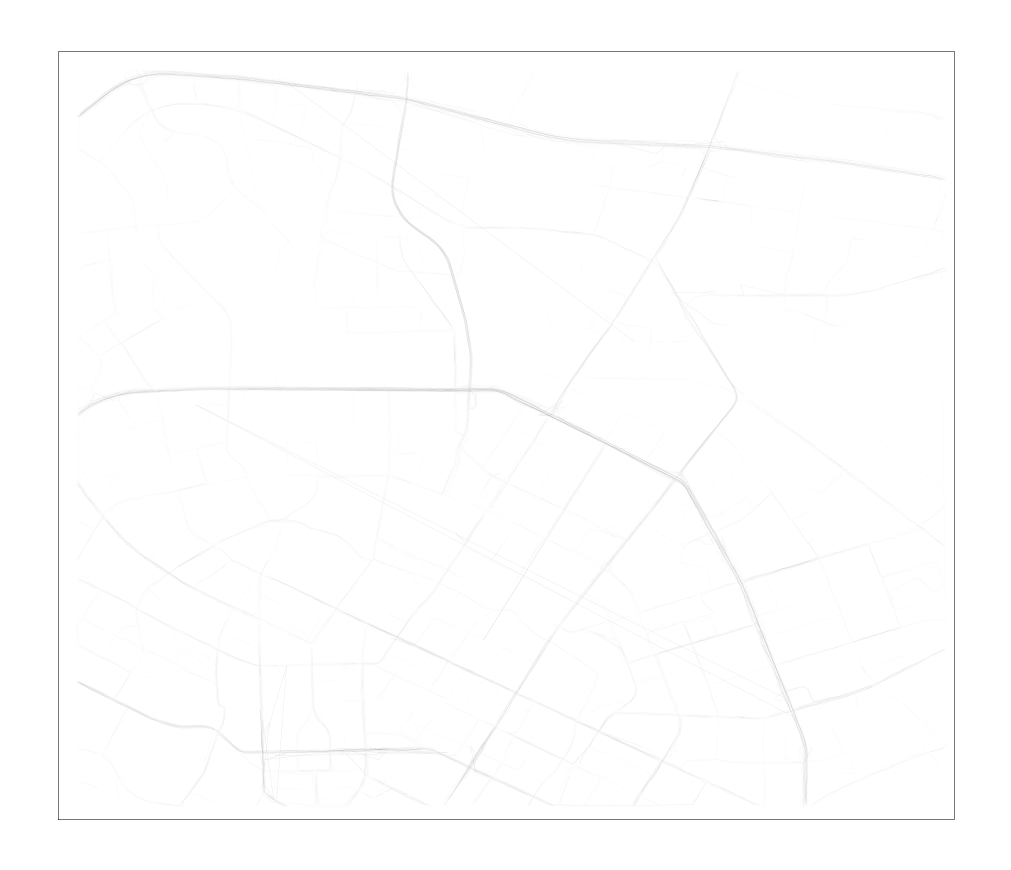

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#nowfile = filenames[0]
Nrow = len(pd.read_csv(os.path.join(dirname, nowfile),skiprows = 0,header = 0,usecols=[0,1,2,3],index_col = 0) )
# Now I don't want to use things like: while loop
raw_data=pd.read_csv(os.path.join(dirname, nowfile),skiprows = 0,header = 0,usecols=[0,1,2,3],index_col = 0,iterator = True)
           
long_lowerbound = 104.0402
lati_lowerbound = 30.6516
long_upperbound = 104.1298
lati_upperbound = 30.7284

x = [0,0,896,896,0]
y = [0,768,768,0,0]
plt.rcParams['figure.dpi'] = 128
plt.rcParams['savefig.dpi'] = 128
plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['image.cmap'] = 'gray'
plt.figure()
# Use https://tool.oschina.net/hexconvert/ to check the hexadecimal value
# 00 -> 00; 255 -> ff; 30 -> 1e; 225 = e1e1e1
plt.subplots_adjust(left = -0.05, bottom = -0.05, right = 1.05, top = 1.05, hspace = 0, wspace = 0)
plt.plot(x,y,color = '#000000', linewidth = 0.3)

for i in range(Nrow):
    print('Now process: ',i,' in /',Nrow)
    speedmatrix = []
    cd = raw_data.get_chunk(1)
    Splitdf = pd.DataFrame([],columns = ['OriginalID','Longitude','Latitude','Timestamp'])
    IDList = cd['Trajectory'].iloc[:].index.tolist()
    for n, ele in enumerate(cd['Trajectory']):
        element = ele.strip('[]').split(',')
        for p in range(len(element)):
            elemen = element[p].split(' ')
            elem = [element[p] for element[p] in elemen if element[p]]
            Longdata = elem[0]
            Latidata = elem[1]
            Timedata = elem[2]
            IDdata = IDList[n]
       # print('OriginalID',IDdata,'Longitude',Longdata,'Latitude',Latidata,'Timestamp',Timedata)
            Split_n = pd.DataFrame({'OriginalID':IDdata,'Longitude':Longdata,'Latitude':Latidata,'Timestamp':Timedata},index = [p])
            Splitdf = Splitdf.append(Split_n,ignore_index = False)
    for k in range(len(Splitdf)-1):
        long0 = float(Splitdf['Longitude'].iloc[k+0])
        lati0 = float(Splitdf['Latitude'].iloc[k+0])
        long1 = float(Splitdf['Longitude'].iloc[k+1])
        lati1 = float(Splitdf['Latitude'].iloc[k+1])
      
        #    long2 = float(Splitdf['Longitude'].iloc[k+2])
#    lati2 = float(Splitdf['Latitude'].iloc[k+2])
        time0 = float(Splitdf['Timestamp'].iloc[k+0])
        time1 = float(Splitdf['Timestamp'].iloc[k+1])
 #   time2 = float(Splitdf['Timestamp'].iloc[k+2])
        if (long0 > long_lowerbound) and (long0 < long_upperbound) and (lati0 > lati_lowerbound) and (lati0 < lati_upperbound) and (time0 > int(nowfile[0:10])) and (time0 < int(nowfile[11:21])):
            Xcoord0 = round(10000*(long0-long_lowerbound))
            Xcoord1 = round(10000*(long1-long_lowerbound))
            Ycoord0 = round(10000*(lati0-lati_lowerbound))
            Ycoord1 = round(10000*(lati1-lati_lowerbound))
    
            Xpoint = [Xcoord0,Xcoord1]
            Ypoint = [Ycoord0,Ycoord1]
  #  Plotcolor = int(255-)
    
            if ((long1-long0)**2+(lati1-lati0)**2) == 0:
                speed1 = 0
            else:
  #      speed1 = (time2-time0)*(((long1-long0)**2+(lati1-lati0)**2)*((long2-long1)**2+(lati2-lati1)**2))**0.5/(((long2-long0)**2+(lati2-lati0)**2))**0.5/((time2-time1)*(time1-time0))*111.19*3600
                speed1 = ((long1-long0)**2+(lati1-lati0)**2)**0.5/(time1-time0)*111.19*3600
                speed1 = round(speed1)
        
#---------------Warning: Here only use 150 speed to control the GPS delay! In future, please use some tech to deal with it!
        
                if (int(speed1) > 150):
                    speed1 = 150.0
                else:
                    pass
                    
         #   speedmatrix = np.append(speedmatrix,speed1)


    
            hexn = hex(255-int(speed1))
            hexnum = (hexn[2:4] if len(hexn) == 4 else ('0'+hexn[2:3]))
            if hexnum == '0x':
                print('Problem: ', long1,long0,lati1,lati0,time1,time0,speed1,i,hexn)
                break
            
            Plotcolor = str('#'+hexnum+hexnum+hexnum)
            plt.plot(Xpoint,Ypoint,color = Plotcolor, linewidth = 0.03)
        else:
            pass
plt.axis('off')
savename = nowfile[0:-4]+'.png'
try:
    plt.savefig(savename)
except ValueError:
    print(speed1)
    print(hexn)